In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Importing Packages

In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers
import tensorflow as tf

from ploting import plotGeneratedImages, plotLoss, plotingLosses, generateImages, plotImages, plotMalveillance
from saving import saveModels
from testingParameters import load_GAN, trainGAN

Using TensorFlow backend.


In [3]:
K.set_image_dim_ordering('th')

# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 50

In [4]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_test = (X_test.astype(np.float32) - 127.5)/127.5
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

size = 40000
X_train, y_train = X_train[:size], y_train[:size]

In [5]:
alphas = [1., 2., 5., 10.]
offsets = [0., 0.1, 1.2, 2.1, 10.1]

historique_malveillance = {"alpha": dict(), "offset": dict()}

# Testing $\alpha$ influence

In [9]:
for alpha in alphas:
    generator, discriminator, GAN = load_GAN(alpha=alpha, offset=0., loss_mode="alpha")
    to_be_used, malveillance, GANloss = trainGAN(discriminator, generator, GAN, X_train=X_train,
             epochs=10, 
             batchSize=128, 
             dLossLimit=0.1,
            randomDim=randomDim)
    historique_malveillance["alpha"][str(alpha)] = dict()
    historique_malveillance["alpha"][str(alpha)]["malveillance"] = malveillance
    historique_malveillance["alpha"][str(alpha)]["images"] = generateImages(generator=generator, randomDim=randomDim, examples=100)

    

Epochs: 10
Batch size: 128
Batches per epoch: 312
--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
Epochs: 10
Batch size: 128
Batches per epoch: 312
--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
Epochs: 10
Batch size: 128
Batches per epoch: 312
--------------- Epoch 1 ---------------
--------

## Graphic output

============= alpha : 1.0 =============


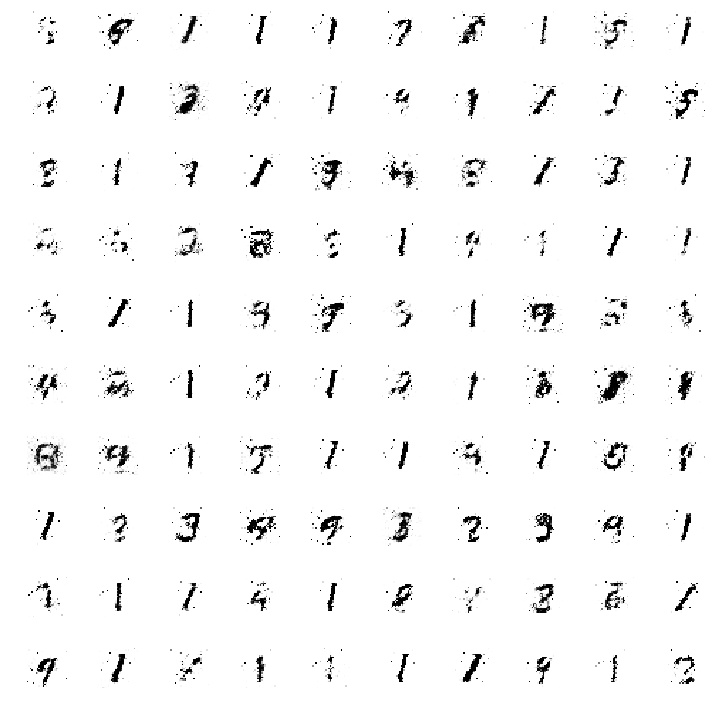

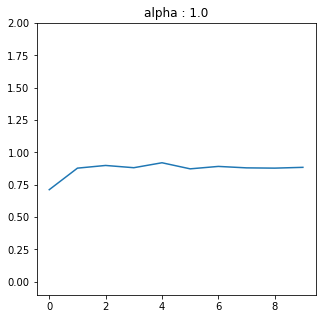

============= alpha : 2.0 =============


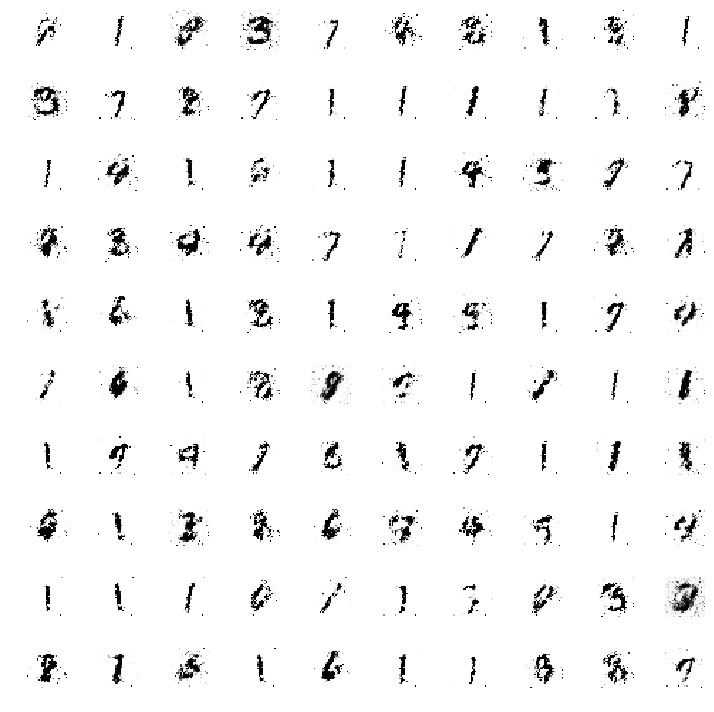

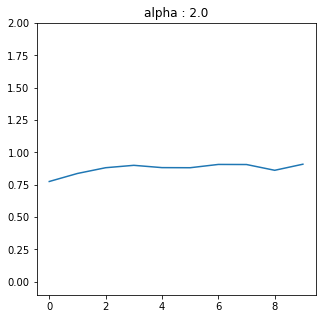

============= alpha : 5.0 =============


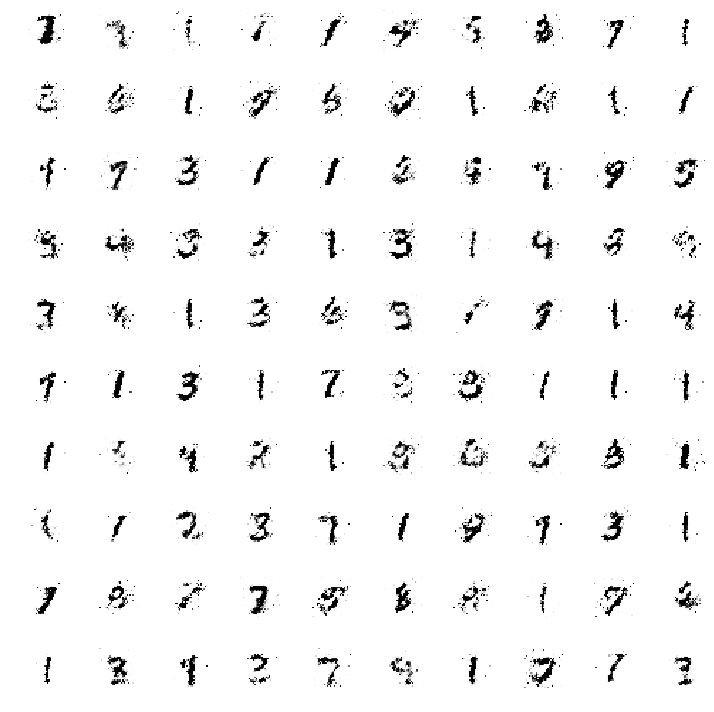

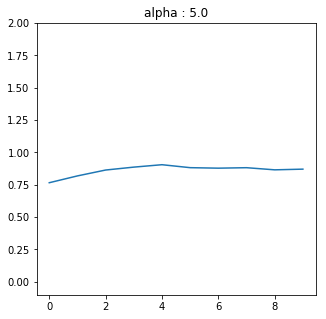

============= alpha : 10.0 =============


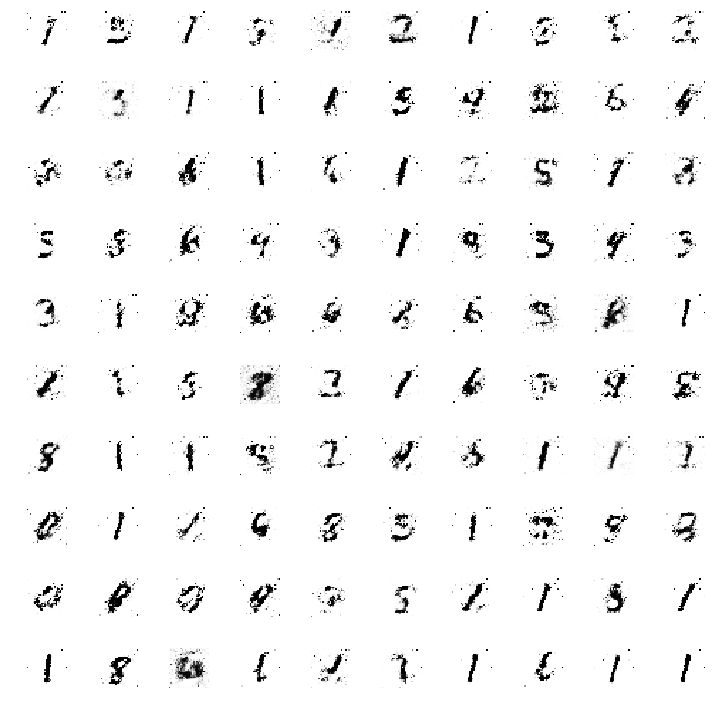

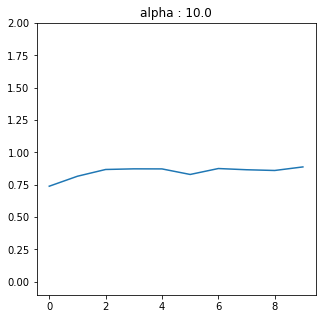

In [10]:
for alpha in alphas:
    print("============= alpha : " + str(alpha) + " =============" )
    plotImages(historique_malveillance["alpha"][str(alpha)]["images"], title="alpha : " + str(alpha))
    plotMalveillance(historique_malveillance["alpha"][str(alpha)]["malveillance"], title="alpha : " + str(alpha))

# Testing offset influence

In [14]:
for offset in offsets:
    generator, discriminator, GAN = load_GAN(alpha=1., offset=offset)
    to_be_used, malveillance, GANloss = trainGAN(discriminator, generator, GAN, X_train=X_train,
             epochs=10, 
             batchSize=128, 
             dLossLimit=0.1,
            randomDim=randomDim)
    historique_malveillance["offset"][str(offset)] = dict()
    historique_malveillance["offset"][str(offset)]["malveillance"] = malveillance
    historique_malveillance["offset"][str(offset)]["images"] = generateImages(generator=generator, randomDim=randomDim, examples=100)
    

Epochs: 10
Batch size: 128
Batches per epoch: 312
--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
Epochs: 10
Batch size: 128
Batches per epoch: 312
--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
Epochs: 10
Batch size: 128
Batches per epoch: 312
--------------- Epoch 1 ---------------
--------

# Graphic output

======================= offset : 0.0 =======================


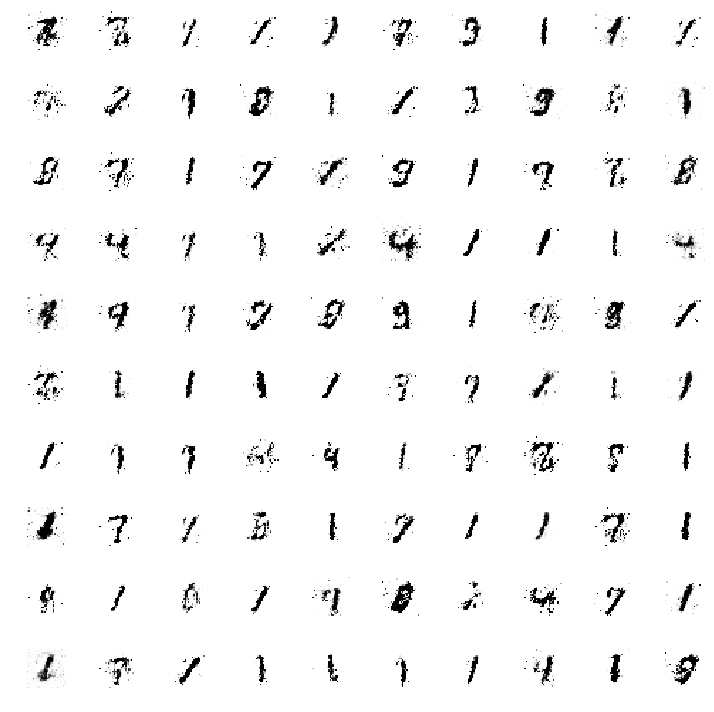

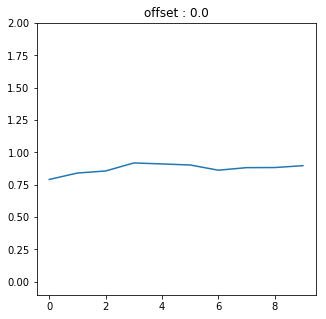

======================= offset : 0.1 =======================


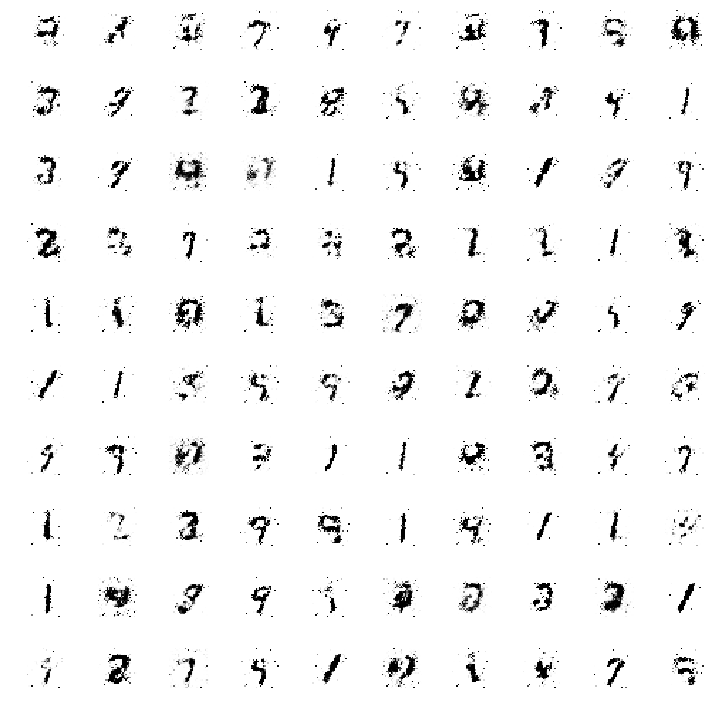

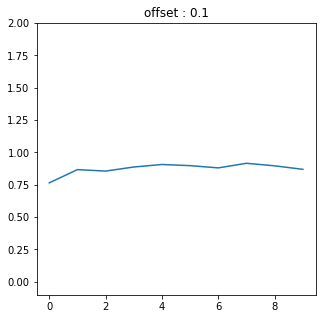

======================= offset : 1.2 =======================


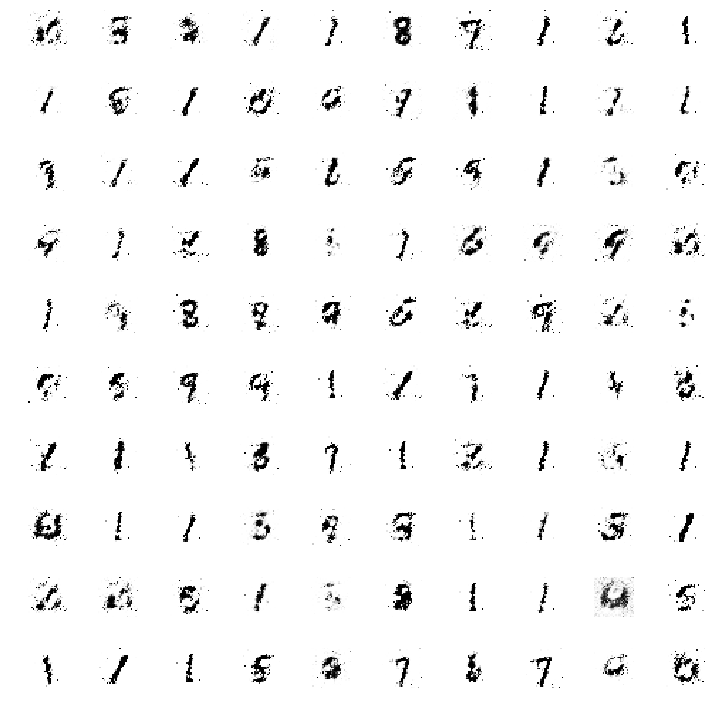

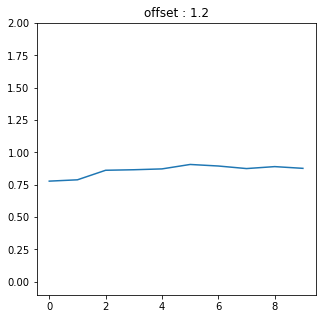

======================= offset : 2.1 =======================


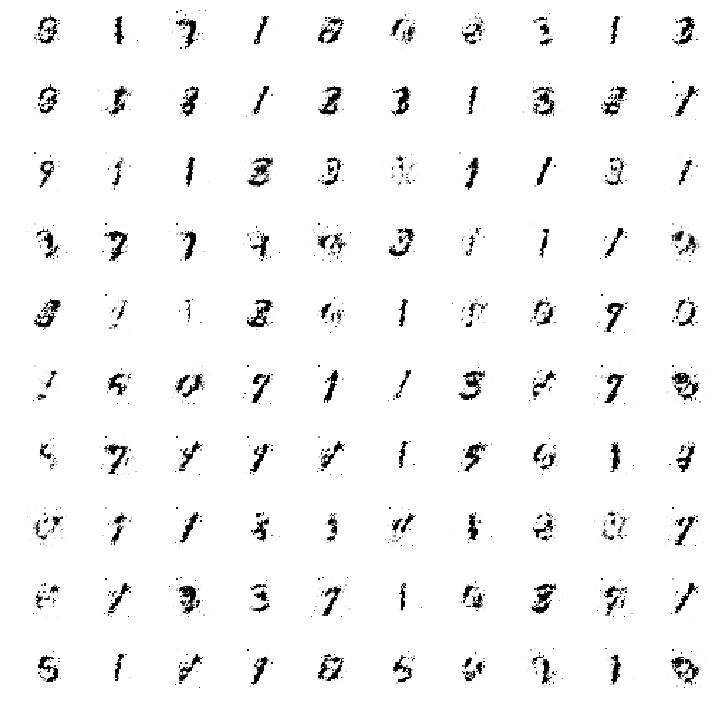

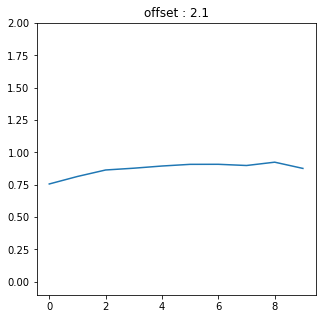

======================= offset : 10.1 =======================


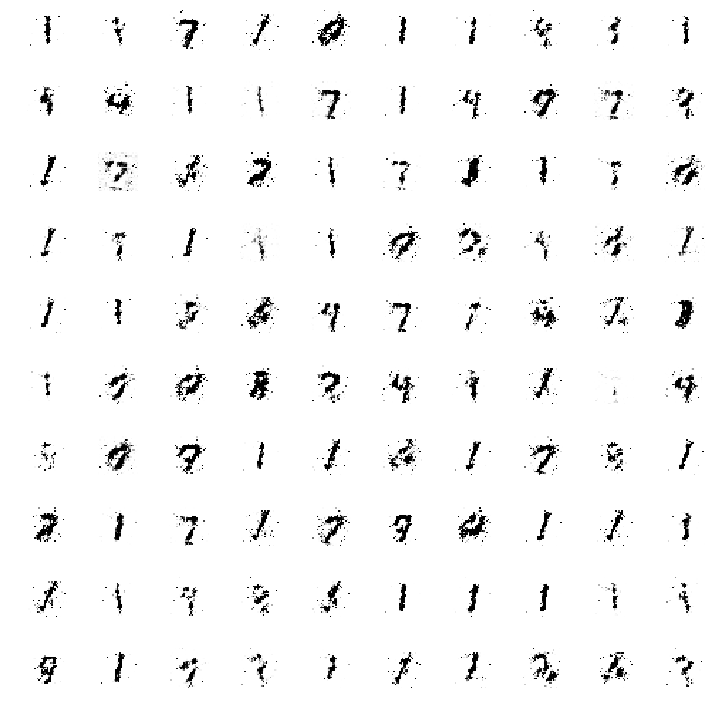

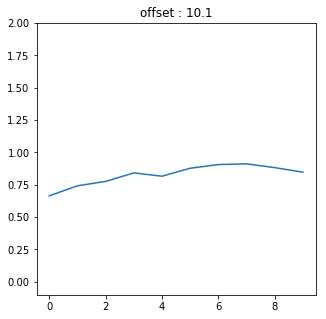

In [16]:
for offset in offsets:
    print("======================= offset : " + str(offset) + " =======================" )
    plotImages(historique_malveillance["offset"][str(offset)]["images"], title="offset : " + str(offset))
    plotMalveillance(historique_malveillance["offset"][str(offset)]["malveillance"], title="offset : " + str(offset))
    print("=================================================================================================")

In [17]:
generator, discriminator, GAN = load_GAN(alpha=5., offset=15.1)
to_be_used, malveillance, GANloss = trainGAN(discriminator, generator, GAN, X_train=X_train,
         epochs=10, 
         batchSize=128, 
         dLossLimit=0.1,
        randomDim=randomDim)

Epochs: 10
Batch size: 128
Batches per epoch: 312
--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------


In [19]:
to_be_used, malveillance, GANloss = trainGAN(discriminator, generator, GAN, X_train=X_train,
         epochs=100, 
         batchSize=128, 
         dLossLimit=0.1,
        randomDim=randomDim)

Epochs: 100
Batch size: 128
Batches per epoch: 312
--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
--------------- Epoch 11 ---------------
--------------- Epoch 12 ---------------
--------------- Epoch 13 ---------------
--------------- Epoch 14 ---------------
--------------- Epoch 15 ---------------
--------------- Epoch 16 ---------------
--------------- Epoch 17 ---------------
--------------- Epoch 18 ---------------
--------------- Epoch 19 ---------------
--------------- Epoch 20 ---------------
--------------- Epoch 21 ---------------
--------------- Epoch 22 ---------------
--------------- Epoch 23 ---------------
---------------

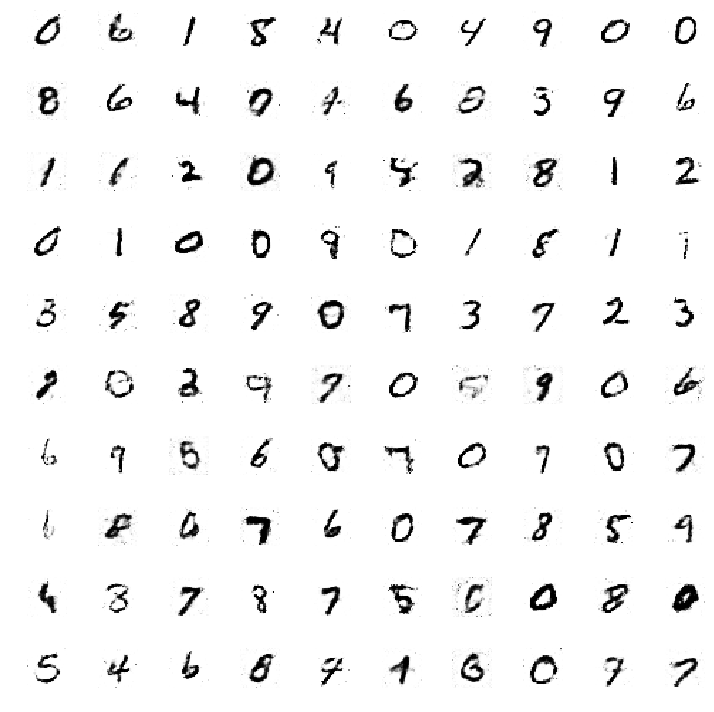

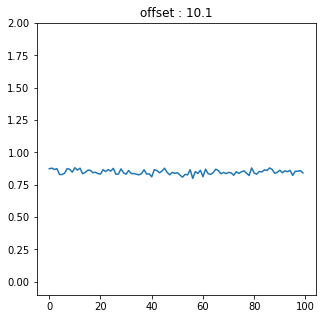

True

In [22]:
images = generateImages(generator=generator, randomDim=randomDim, examples=100)
plotImages(images)
plotMalveillance(malveillance, title="offset : " + str(offset))

In [9]:
images = generateImages(generator=generator_excess, randomDim=randomDim, examples=10000)

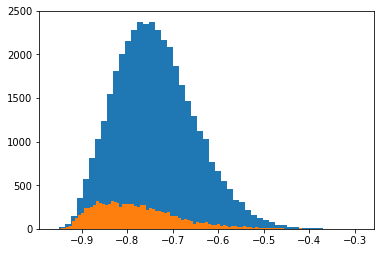

In [10]:
plt.hist([np.mean(x) for x in X_train],bins=50)
plt.hist([np.mean(x) for x in images],bins=100)

plt.show()
plt.close()

In [14]:
K.pow

<function keras.backend.tensorflow_backend.exp(x)>

## Excess

In [7]:
generator_excess, discriminator_excess, GAN_excess = load_GAN(alpha=100., offset=100.1, loss_mode="pow", power=3)
to_be_used_excess, malveillance_excess, GANloss_excess = trainGAN(discriminator_excess, generator_excess, GAN_excess, X_train=X_train,
         epochs=100, 
         batchSize=128, 
         dLossLimit=0.1,
        randomDim=randomDim)

Epochs: 100
Batch size: 128
Batches per epoch: 312
--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
--------------- Epoch 11 ---------------
--------------- Epoch 12 ---------------
--------------- Epoch 13 ---------------
--------------- Epoch 14 ---------------
--------------- Epoch 15 ---------------
--------------- Epoch 16 ---------------
--------------- Epoch 17 ---------------
--------------- Epoch 18 ---------------
--------------- Epoch 19 ---------------
--------------- Epoch 20 ---------------
--------------- Epoch 21 ---------------
--------------- Epoch 22 ---------------
--------------- Epoch 23 ---------------
---------------

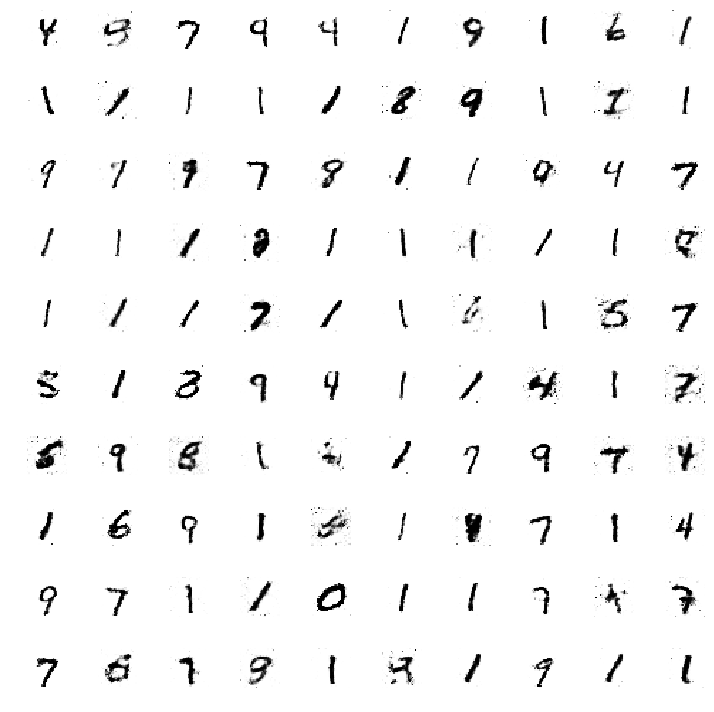

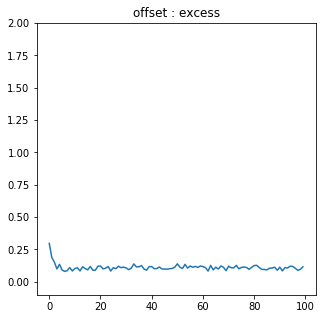

True

In [8]:
images_excess = generateImages(generator=generator_excess, randomDim=randomDim, examples=100)
plotImages(images_excess)
plotMalveillance(malveillance_excess, title="offset : " + "excess")

In [11]:
examples = 100
noise = np.random.normal(0, 1, size=[examples, randomDim])
generatedImages = generator_excess.predict(noise)

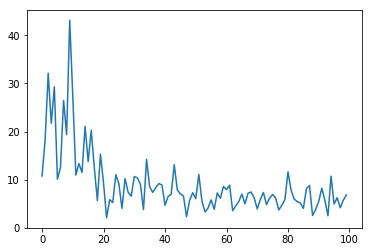

In [13]:
plt.plot(GANloss_excess)
plt.show()
plt.close()


# With sum

In [9]:
generator_sum, discriminator_sum, GAN_sum = load_GAN(loss_mode="sum", offset=0.)
to_be_used_sum, malveillance_sum, GANloss_sum = trainGAN(discriminator_sum, generator_sum, GAN_sum, X_train=X_train,
         epochs=100, 
         batchSize=128, 
         dLossLimit=0.1,
        randomDim=randomDim)

Epochs: 100
Batch size: 128
Batches per epoch: 312
--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
--------------- Epoch 11 ---------------
--------------- Epoch 12 ---------------
--------------- Epoch 13 ---------------
--------------- Epoch 14 ---------------
--------------- Epoch 15 ---------------
--------------- Epoch 16 ---------------
--------------- Epoch 17 ---------------
--------------- Epoch 18 ---------------
--------------- Epoch 19 ---------------
--------------- Epoch 20 ---------------
--------------- Epoch 21 ---------------
--------------- Epoch 22 ---------------
--------------- Epoch 23 ---------------
---------------

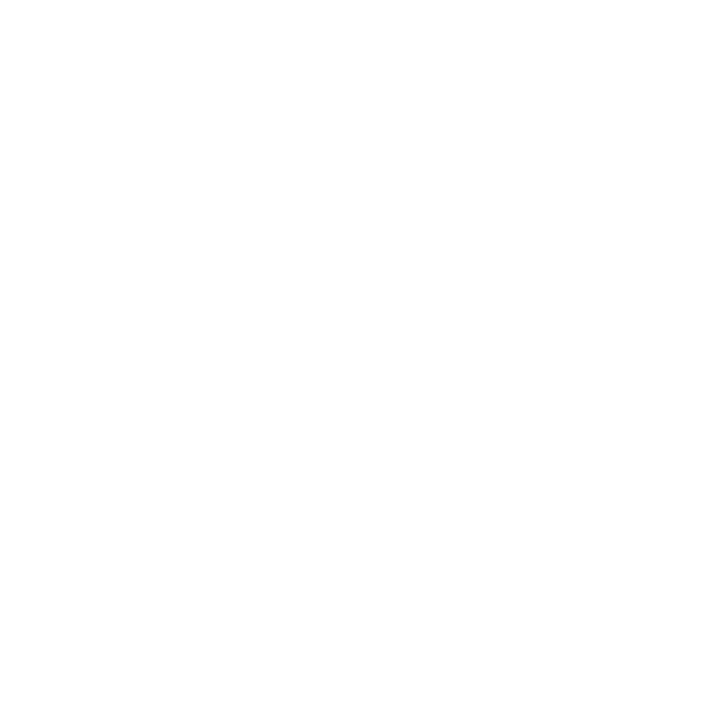

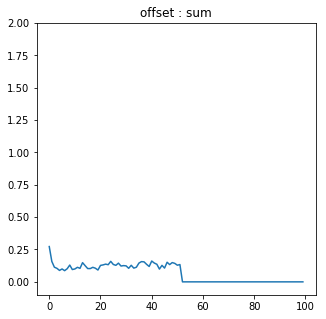

True

In [10]:
images_sum = generateImages(generator=generator_sum, randomDim=randomDim, examples=100)
plotImages(images_sum)
plotMalveillance(malveillance_sum, title="offset : " + "sum")

In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('models/gan10epochs.json', 'r')
loaded_disc = json_file.read()
json_file.close()
loaded_disc = model_from_json(loaded_disc)
# load weights into new model
loaded_disc.load_weights("models/modelGAN10epochs.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
# Optimizer
oldadam = Adam(lr=0.0002, beta_1=0.5)

loaded_disc.compile(loss='binary_crossentropy', optimizer=oldadam, metrics=["accuracy"])


In [ ]:
plt.hist(loaded_disc.predict(generatedImages))

In [ ]:
examples = 100
noise = np.random.normal(0, 1, size=[examples, randomDim])
generatedImages = generator.predict(noise)
realImages = X_test[:examples].reshape(100,28*28)
gI = discriminator.predict(generatedImages)
rI = discriminator.predict(realImages)
plt.hist(gI, bins=30, label="generated", normed=True)
plt.legend()
plt.show()
plt.close()
plt.hist(rI, bins=30,label="real", normed=True)
plt.legend()
plt.show()
plt.close()

In [ ]:
plt.hist([malveillance(r) for r in realImages])
plt.title("Real")
plt.show()
plt.close()
plt.hist([malveillance(g) for g in generatedImages])
plt.title("Generated")
plt.show()
plt.close()

In [ ]:
evaluateGeneratedImages(generator, 100)

In [ ]:
def malveillance2(image):
    return np.mean(np.abs(- image +np.ones(784))/2)

In [ ]:
np.mean((-X_test[0] + np.ones_like(X_test[0]) )/2)

In [ ]:
generateIma

In [ ]:
plotImages(X_test[:100].reshape(100,28,28))

In [ ]:
X_test[:100].shape

In [ ]:
images = generateImages(generator, randomDim, 100).reshape(100,784)
plotImages(images.reshape(100,28,28))

In [ ]:
np.mean([malveillance2(im) for im in images])

In [ ]:
np.mean([malveillance2(im) for im in X_test])